In [23]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [24]:
df = pd.read_csv('Churn_Modelling.csv')
df.head


<bound method NDFrame.head of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfPro

In [25]:
df.shape

(10000, 14)

In [26]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [27]:
df = df.drop(['CustomerId', 'Surname'], axis=1)

In [28]:
X = df.drop(['Exited'], axis=1)
Y = df['Exited']

In [29]:
X.shape

(10000, 11)

In [30]:
Y.shape

(10000,)

In [31]:
X = pd.get_dummies(X, dtype=int)
X

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,2,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,3,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,4,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,5,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,9997,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,9998,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,9999,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [33]:
len(x_train), len(y_train), len(x_test), len(y_test)

(8000, 8000, 2000, 2000)

In [34]:
x_train

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
9254,9255,686,32,6,0.00,2,1,1,179093.26,1,0,0,0,1
1561,1562,632,42,4,119624.60,2,1,1,195978.86,0,1,0,0,1
1670,1671,559,24,3,114739.92,1,1,0,85891.02,0,0,1,0,1
6087,6088,561,27,9,135637.00,1,1,0,153080.40,1,0,0,1,0
6669,6670,517,56,9,142147.32,1,0,0,39488.04,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,5735,768,54,8,69712.74,1,1,1,69381.05,1,0,0,0,1
5191,5192,682,58,1,0.00,1,1,1,706.50,1,0,0,1,0
5390,5391,735,38,1,0.00,3,0,0,92220.12,1,0,0,1,0
860,861,667,43,8,190227.46,1,1,0,97508.04,1,0,0,0,1


In [35]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [36]:
x_train_scaled.shape

(8000, 14)

In [37]:
model = Sequential()
model.add(Dense(3, input_shape=(14,), activation='relu'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

/home/nauman/deeplearning_projects/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
# model.layers[0].get_weights()# 3 * 8
# model.layers[1].get_weights() # 8 * 3
model.layers[2].get_weights() # 1 * 8

[array([[ 0.5661595 ],
        [-0.5024766 ],
        [-0.7983179 ],
        [-0.02437282],
        [-0.00851673],
        [-0.61372423],
        [ 0.22318971],
        [-0.6405812 ]], dtype=float32),
 array([0.], dtype=float32)]

In [39]:
model.compile(metrics=['accuracy'], loss='binary_crossentropy', optimizer='adam')

In [40]:
history = model.fit(x_train_scaled, y_train, epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7883 - loss: 0.5181
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7866 - loss: 0.4977
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7902 - loss: 0.4727
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7901 - loss: 0.4483
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8095 - loss: 0.4288
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8106 - loss: 0.4387
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8104 - loss: 0.4370
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8071 - loss: 0.4334
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8169 - loss: 0.4232
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8207 - loss: 0.4181


In [41]:
history.history['loss']

[0.5039001703262329,
 0.48204147815704346,
 0.45914721488952637,
 0.44163647294044495,
 0.43303200602531433,
 0.42899441719055176,
 0.4264586865901947,
 0.424686998128891,
 0.4233623147010803,
 0.421880841255188]

In [42]:
y_pred = model.predict(x_test_scaled)
y_pred = np.where(y_pred>0.5,1,0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [43]:
print(accuracy_score(y_test,y_pred))

0.8205


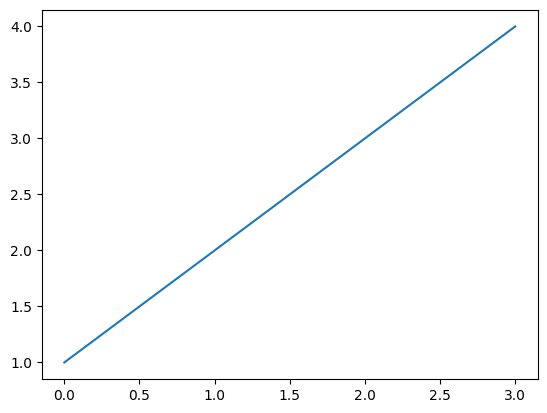

In [44]:
x = [1,4,9,16]
plt.plot(x)